In [1]:
import pathlib
import os

import h5py
import pandas as pd
import json
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
# import dask.array as da
# import dask.dataframe as dd
import skimage 


import SessionTools.two_photon as st2p


%load_ext autoreload
%autoreload 2 

%matplotlib inline

In [2]:
import napari as nap
viewer = nap.Viewer()

In [19]:
date = "18_04_2023"
fly = "R60D05_jGCaMP7f_tdc2lexa_CsChrimsontdT_fly1"
session = 'ZSeries-04182023-1105-218'
basedir = pathlib.PurePath(f'/media/mplitt/SSD_storage/2PData/{date}/{fly}/{session}/')
basename_input = pathlib.Path(basedir.joinpath(session))
metadata = st2p.preprocessing.bruker_metadata.read(basename_input)

metadata['size']['z_planes']=metadata['layout']['frames_per_sequence']

In [20]:
h5name = f'/media/mplitt/SSD_storage/2P_scratch/{date}/{fly}/{session}/data.h5'
if not os.path.exists(h5name):
    tiff_data = st2p.preprocessing.tiff_tools.read(basename_input, 
                                            metadata['size'],metadata['layout'], first_chan=1)
    st2p.preprocessing.tiff_tools.convert_to_hdf5(tiff_data,h5name, overwrite=True)

(512, 512)
[########################################] | 100% Completed | 203.65 ms


In [21]:
f = h5py.File(h5name)
data = f['/data'][:]

In [22]:
data.shape

(2, 1, 36, 512, 512)

In [23]:
data = np.squeeze(data)


In [24]:
data.shape

(2, 36, 512, 512)

In [25]:
import napari
nap = napari.view_image(data[0:1,:,:,:], channel_axis=0)
nap.add_image(data[1:,:,:,:], channel_axis=0)


[<Image layer 'Image [1]' at 0x7fc7b04f0250>]

In [2]:
import napari 
import czifile

In [44]:
with czifile.CziFile('/home/mplitt/Downloads/flyE5_R56H10_R73A06_E_full_brain_110424.czi') as czi:
    img_data = np.squeeze(czi.asarray())
print(img_data.shape)
img_data_norm = img_data/np.amax(np.amax(img_data,axis=-2,keepdims=True),axis=-1,keepdims=True)

(2, 130, 512, 512)


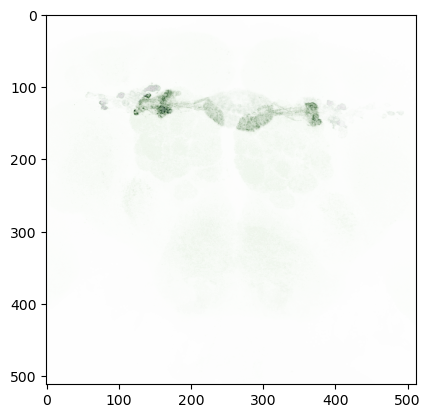

In [45]:
fig, ax = plt.subplots()
ax.imshow(np.amax(img_data,axis=1)[0,:,:],cmap='Greens',alpha=np.amax(img_data,axis=1)[1,:,:]/np.amax(np.amax(img_data,axis=1)[1,:,:].ravel()))
ax.imshow(np.amax(img_data,axis=1)[1,:,:],cmap='Greys',alpha=np.amax(img_data,axis=1)[0,:,:]/np.amax(np.amax(img_data,axis=1)[0,:,:].ravel()))

In [46]:
# data = np.zeros((512,512))

nap = napari.view_image(np.amax(img_data[0,:,:,:],axis=0))
nap.add_image(np.amax(img_data[1,:,:,:],axis=0))

<Image layer 'Image [1]' at 0x713229abf1c0>

In [30]:
nap = napari.view_image(img_data[1,:,:,:,np.newaxis]*np.ones((1,1,1,3)))